## import

In [ ]:
import os
import re
import gc
import yaml

import torch
import numpy as np
import torch.nn as nn

import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from matplotlib.patches import Rectangle

from pathlib import Path
from PIL import Image

from synthesize import *


from accelerate import Accelerator
accelerator = Accelerator()

## Configs

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# print(device)

preprocess_config = yaml.load(open("./config/LibriTTS/preprocess.yaml", "r"), Loader=yaml.FullLoader)
train_config = yaml.load(open("./config/LibriTTS/train.yaml", "r"), Loader=yaml.FullLoader)
model_config = yaml.load(open("./config/LibriTTS/model.yaml", "r"), Loader=yaml.FullLoader)

configs = (preprocess_config, model_config, train_config)
print("Configs Done")

Configs Done


## Model Saved Step: `restore_step`

In [ ]:
class sample_args:
    restore_step = 53100

model_id= sample_args.restore_step,
sample_args.restore_step, sample_args

(53100, __main__.sample_args)

In [ ]:
### Model
model= get_model(sample_args, configs, device = device, train=False)
print("Model Done")

Model Done


In [ ]:
raw_texts = "저는 연구실에서 티티에스를 연구하고 있습니다."
ids, raw_texts, phones, audio_result_path, mel_result_path = syn(raw_texts, model = model, device = accelerator.device, configs = configs,
                                                                 lang = 'ko', control_values = (1.0, 1.0, 1.0 ), accelerator = accelerator )

Using cache found in /home/heiscold/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


HiFi-GAN: Removing weight norm.
DownLoaded | NVIDIA's HiFi-GAN from torch hub | SR: 22050
['@ɕ']
SENTENCE: 저는 연구실에서 티티에스를 연구하고 있습니다.
Phones:  {t ɕ ʌː n ɨ n j ʌ n ɡ u ɕʰ i ɾ e sʰ ʌ tʰ i tʰ i e sʰ ɨ ɾ ɨ ɭ j ʌː n ɡ u ɦ ɐ ɡ o iː s s ɨ m n i d ɐ}
Synthesize Completed
SAVED PATHS: AUDIO @ /home/heiscold/outcome_kor/t25_endgame/result/s.wav
SAVED PATHS: Mel_Spectrogram @ /home/heiscold/outcome_kor/t25_endgame/result/s.wav


MODEL ID: (53100,)
SENTENCE: 저는 연구실에서 티티에스를 연구하고 있습니다.
Pure Length 25
Phones: {t ɕ ʌː n ɨ n j ʌ n ɡ u ɕʰ i ɾ e sʰ ʌ tʰ i tʰ i e sʰ ɨ ɾ ɨ ɭ j ʌː n ɡ u ɦ ɐ ɡ o iː s s ɨ m n i d ɐ}
/home/heiscold/outcome_kor/t25_endgame/result/s.wav


/home/heiscold/outcome_kor/t25_endgame/result/s.png


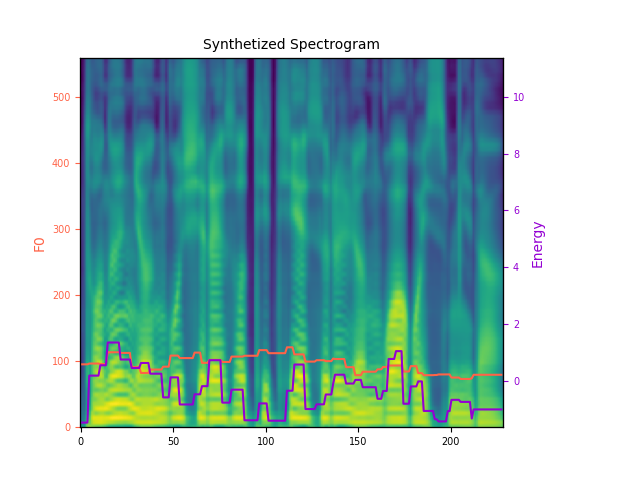

In [ ]:
print(f"MODEL ID: {model_id}")
print(f"SENTENCE: {raw_texts}")
print(f"Pure Length {len(raw_texts)}")
print(f"Phones: {phones}")

sample_rate = 22050
## This is Predicted Speech

print(audio_result_path)
ipd.display(ipd.Audio(audio_result_path, rate =sample_rate))

print(mel_result_path)
Image.open(mel_result_path).convert("RGB")

# `CLI` environment
 : When you wanna check the outputs of Terminal Commands in Jupyter-Notebook.

### import

In [ ]:
import os
import re
import gc
import yaml

import torch
import numpy as np
import torch.nn as nn

import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from matplotlib.patches import Rectangle

from pathlib import Path
from PIL import Image

from synthesize import *

### About Path

In [ ]:
## Path
ids = 'synth'

## AUDIO, MEL SAVE PATH
audio_result_path = train_config["path"]["result_path"] + f"/{ids[0]}.wav"
mel_result_path = train_config["path"]["result_path"] + f"/{ids[0]}.png"

/home/heiscold/outcome_kor/t25_endgame/result/s.wav


/home/heiscold/outcome_kor/t25_endgame/result/s.png


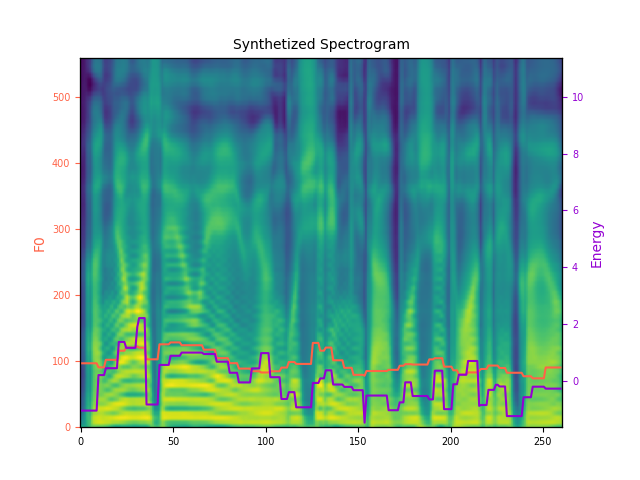

In [ ]:
sample_rate = 22050
## This is Predicted Speech

print(audio_result_path)
ipd.display(ipd.Audio(audio_result_path, rate =sample_rate))

print(mel_result_path)
Image.open(mel_result_path).convert("RGB")